In [1]:
import pandas as pd
import numpy as np
import prepare as pr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df=pr.clean_df()

# I am focusing on biology

In [3]:
def tts(df, stratify=None):
    '''
    removing your test data from the data
    '''
    train_validate, test=train_test_split(df, 
                                 train_size=.8, 
                                 random_state=137,
                                 stratify=None)
    '''
    splitting the remaining data into the train and validate groups
    '''            
    train, validate =train_test_split(train_validate, 
                                      test_size=.3, 
                                      random_state=137,
                                      stratify=None)
    return train, validate, test

In [35]:
df.head()

,school_id,english_1,english_2,algebra,biology,history,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
0,1902001,67.0,82.0,95.0,88.0,93.0,1.2,34.3,55259.0,16.4,1852.0,10656.0,10.1,18.0,65.6,22.0
1,1903001,75.0,87.0,76.0,92.0,93.0,1.3,34.5,48689.0,21.6,2056.0,11177.0,8.3,27.2,51.2,29.4
2,1904001,78.0,80.0,90.0,87.0,88.0,4.7,42.2,51538.0,15.2,2151.0,10885.0,8.8,42.2,42.6,37.0
3,1906002,82.0,80.0,100.0,100.0,96.0,2.9,48.1,58500.0,20.4,1899.0,15043.0,11.9,20.5,59.1,9.8
4,1907001,64.0,66.0,82.0,83.0,83.0,13.8,79.9,52703.0,17.4,1504.0,11129.0,12.2,22.7,59.9,20.8


In [4]:
train, val, test = tts(df)
train.shape, val.shape, test.shape

((778, 16), (334, 16), (279, 16))

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
school_id,778.0,1.166658e+08,7.308367e+07,1902001.0,5.790505e+07,1.019125e+08,1.789110e+08,253901001.0
english_1,778.0,6.711568e+01,1.763244e+01,10.0,5.700000e+01,6.800000e+01,8.000000e+01,100.0
english_2,778.0,7.229049e+01,1.638062e+01,0.0,6.300000e+01,7.400000e+01,8.400000e+01,100.0
algebra,778.0,7.323265e+01,1.784067e+01,0.0,6.400000e+01,7.600000e+01,8.600000e+01,100.0
biology,778.0,8.278406e+01,1.377712e+01,19.0,7.600000e+01,8.600000e+01,9.300000e+01,100.0
history,778.0,8.782905e+01,1.102602e+01,30.0,8.400000e+01,9.100000e+01,9.500000e+01,100.0
bilingual_or_english_learner,778.0,1.296581e+01,1.392269e+01,0.0,3.100000e+00,7.950000e+00,1.760000e+01,99.6
econdis,778.0,5.851735e+01,2.337060e+01,0.2,4.052500e+01,5.925000e+01,7.790000e+01,100.0
salary,778.0,5.800434e+04,5.638828e+03,30166.0,5.419300e+04,5.837100e+04,6.223225e+04,76933.0
teacher_exp_6to10,778.0,1.936234e+01,8.024472e+00,0.0,1.452500e+01,1.970000e+01,2.400000e+01,57.1


In [112]:
train[train['econdis']>58.5]['english_1'].mean()

59.32828282828283

In [113]:
train[train['econdis']>58.5]['english_2'].mean()

65.54040404040404

In [114]:
train[train['econdis']>58.5]['algebra'].mean()

68.30050505050505

In [115]:
train[train['econdis']>58.5]['biology'].mean()

77.6590909090909

In [116]:
train[train['econdis']>58.5]['history'].mean()

84.17929292929293

In [122]:
train[train['bilingual_or_english_learner']>13]['english_1'].mean()

57.36802973977695

In [123]:
train[train['bilingual_or_english_learner']>13]['english_2'].mean()

63.49814126394052

In [124]:
train[train['bilingual_or_english_learner']>13]['algebra'].mean()

66.9182156133829

In [125]:
train[train['bilingual_or_english_learner']>13]['biology'].mean()

75.95910780669145

In [126]:
train[train['bilingual_or_english_learner']>13]['history'].mean()

83.37546468401487

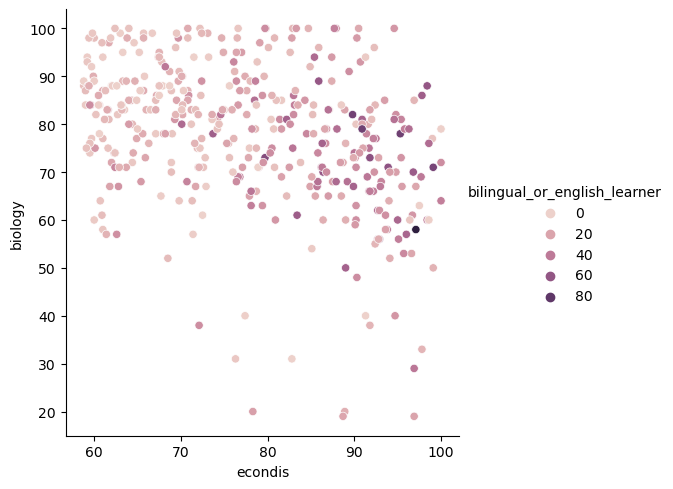

In [134]:
a=train[train['bilingual_or_english_learner']>13]
b=train[train['econdis']>58.5]
sns.relplot(x='econdis', y='biology', hue='bilingual_or_english_learner', data=b)
plt.show()

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 1:</h2>
    </header>
    <dl>
        <dt>Do schools with a average salary above 55,000 have significantly higher biology STAAR scores on average?</dt>
        <dd>- $H_0$: There is no difference in the average STAAR score of schools with average salary above 55,000 compared to all schools</dd>
        <dd>- $H_a$: The average STAAR score of schools with average salary above 55,000 is significantly higher than all schools</dd>
    </dl>
</div>

In [69]:
alpha=0.05

In [213]:
salmore=train[train['salary']>55000]

In [214]:
salless=train[train['salary']<=55000]

In [215]:
salmore.shape, salless.shape

((550, 16), (228, 16))

In [216]:
stats.ttest_ind(salmore.biology, salless.biology, alternative='greater')

Ttest_indResult(statistic=-0.6128301072372208, pvalue=0.7299158835449202)

In [218]:
stats.ttest_ind(salmore.english_1, salless.english_1, alternative='less')

Ttest_indResult(statistic=-1.1466079913202345, pvalue=0.1259485475046798)

**Takeaway**
* no

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 2:</h2>
    </header>
    <dl>
        <dt>Are biology STAAR scores lower in schools where less than 30% of teachers do not have higher education compared to schools that have 30% or more teachers with higher education (masters/doctorate)?</dt>
        <dd>- $H_0$: There is no difference in the average STAAR score for biology in schools where less than 30% of teachers do not have higher education compared to schools where 30% or more teachers do have higher education</dd>
        <dd>- $H_a$: The difference in the average STAAR score for biology is <strong>significantly lower</strong> in schools where less than 30% of teachers do not have higher education compared to schools where 30% or more teachers do have higher education</dd>
    </dl>
</div>

In [219]:
high=train[train['high_edu']>30]

In [220]:
low=train[train['high_edu']<=30]

In [221]:
high.shape, low.shape

((408, 16), (370, 16))

In [222]:
stats.ttest_ind(high.biology, low.biology, alternative='greater')

Ttest_indResult(statistic=1.6070811839061203, pvalue=0.05422167415863306)

In [223]:
stats.ttest_ind(low.biology, high.biology, alternative='less')

Ttest_indResult(statistic=-1.6070811839061203, pvalue=0.05422167415863306)

In [226]:
stats.ttest_ind(low.english_1, high.english_1, alternative='less')

Ttest_indResult(statistic=-1.5231993539003101, pvalue=0.06405811631049248)

**Takeaway**
* almost

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 3:</h2>
    </header>
    <dl>
        <dt>Do schools with more economically disadvantaged students have a lower average STAAR score for biology than all schools?</dt>
        <dd>- $H_0$: There is no difference in the average STAAR score for biology in schools with 50% or more  economically disadvantaged students and all schools</dd>
        <dd>- $H_a$: The difference in the average STAAR score for biology is <strong>significantly lower</strong> in schools with 50% or more economically disadvantaged students compared to all schools</dd>
    </dl>
</div>

In [6]:
high=train[train['econdis']>58.5]

In [11]:
low=train[train['econdis']<=58.5]

In [7]:
high.shape, train.shape

((396, 16), (778, 16))

In [12]:
stats.ttest_ind(high.biology, low.biology, alternative='less')

Ttest_indResult(statistic=-11.408513263974722, pvalue=2.791766624040222e-28)

In [14]:
high.biology.mean(), low.biology.mean()

(77.6590909090909, 88.09685863874346)

In [8]:
stats.ttest_1samp(high.biology, train.biology.mean(), alternative='less')

Ttest_1sampResult(statistic=-6.898812310504107, pvalue=1.0467101171136474e-11)

In [9]:
stats.ttest_1samp(high.english_1, train.english_1.mean(), alternative='less')

Ttest_1sampResult(statistic=-8.753665030824344, pvalue=3.0460188742547295e-17)

In [15]:
train.biology.mean()

82.7840616966581

In [10]:
high.english_1.mean(), train.english_1.mean()

(59.32828282828283, 67.11568123393316)

**Takeaway**
* yes

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 4:</h2>
    </header>
    <dl>
        <dt>Do schools with lower student to teacher ratio have a higher average STAAR score in biology?</dt>
        <dd>- $H_0$: There is no difference in the average STAAR score for biology in schools 14 or less students per teacher on average compared to schools that have more than 14 students per teacher on average</dd>
        <dd>- $H_a$: The difference in the average STAAR score for biology is <strong>significantly higher</strong> in schools with 14 or less students per teacher on average compared to schools where the average student to teacher count is greater than 14</dd>
    </dl>
</div>

In [232]:
low=train[train['student_teacher_ratio']<=14]

In [233]:
high=train[train['student_teacher_ratio']>14]

In [234]:
high.shape, low.shape

((411, 16), (367, 16))

In [235]:
stats.ttest_ind(low.biology, high.biology, alternative='greater')

Ttest_indResult(statistic=0.7048095631096019, pvalue=0.24057011724642047)

In [238]:
stats.ttest_ind(low.english_1, high.english_1, alternative='greater')

Ttest_indResult(statistic=0.8451929012191587, pvalue=0.19913182967932297)

**Takeaway**
* no

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 5:</h2>
    </header>
    <dl>
        <dt>Do schools with teachers that have more years of experience have a better average STAAR score in biology?</dt>
        <dd>- $H_0$: There is no difference in the average STAAR score for biology in schools with 50% or fewer teachers with 11 years of experience or more and schools with more than 50% of their teachers with 11 years of experience or more</dd>
        <dd>- $H_a$: The difference in the average STAAR score for biology is <strong>significantly lower</strong> in schools with 50% or fewer teachers with 11 years of experience or more compared to schools with 50% or more teachers with 11 years of experience or more </dd>
    </dl>
</div>

In [28]:
df.head(2)

,school_id,english_1,english_2,algebra,biology,history,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
0,1902001,67.0,82.0,95.0,88.0,93.0,1.2,34.3,55259.0,16.4,1852.0,10656.0,10.1,18.0,65.6,22.0
1,1903001,75.0,87.0,76.0,92.0,93.0,1.3,34.5,48689.0,21.6,2056.0,11177.0,8.3,27.2,51.2,29.4


In [96]:
def teacher_ex(df):
    '''
    This function will make a dataframe of the percent passing average staar score for schools with above and
    below average teachers with 11 years or more experience
    '''
    train, val, test = tts(df)
    subject=['English 1', 'English 2', 'Algebra', 'Biology', 'U.S. History']
    
    low=train[train['teacher_exp_11_plus']<=48.5]
    high=train[train['teacher_exp_11_plus']>48.5]
    
    less11plus=[round(low.english_1.mean(),2), round(low.english_2.mean(), 2), round(low.algebra.mean(),2),
                round(low.biology.mean(),2), round(low.history.mean(),2)]
    more11plus=[round(high.english_1.mean(),2), round(high.english_2.mean(),2), round(high.algebra.mean(),2),
                round(high.biology.mean(),2), round(high.history.mean(),2)]
    
    te1, pe1=stats.ttest_ind(low.english_1, high.english_1, alternative='less')
    te2, pe2=stats.ttest_ind(low.english_2, high.english_2, alternative='less')
    ta, pa=stats.ttest_ind(low.algebra, high.algebra, alternative='less')
    tb, pb=stats.ttest_ind(low.biology, high.biology, alternative='less')
    th, ph=stats.ttest_ind(low.history, high.history, alternative='less')
    
    pval=[pe1, pe2, pa, pb, ph]
    
    data= pd.DataFrame(index=subject,data={
        'Above Average': more11plus,
        'Below Average': less11plus,
        'p-value': pval
    }
                      )
    return data

In [98]:
ma=teacher_ex(df)
ma

,Above Average,Below Average,p-value
English 1,71.20,62.79,8.067572e-12
English 2,76.03,68.33,1.599697e-11
Algebra,77.71,68.50,1.294142e-13
Biology,85.90,79.49,2.454686e-11
U.S. History,89.94,85.59,1.435440e-08


In [120]:
def q2_plot(df):
    ma=teacher_ex(df)

    plt.figure(figsize=(10,5))
    X = ['English 1', 'English 2', 'Algebra', 'Biology', 'U.S. History']

    X_axis = np.arange(len(X))

    plt.bar(X_axis[0] - 0.1, ma['Above Average'][0], 0.2, label = 'Above Average', color=['blue'], ec='black')
    plt.bar(X_axis[0] + 0.1, ma['Below Average'][0], 0.2, label = 'Below Average', color=['orange'], ec='black')

    plt.bar(X_axis[1] - 0.1, ma['Above Average'][1], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[1] + 0.1, ma['Below Average'][1], 0.2, color=['orange'], ec='black')

    plt.bar(X_axis[2] - 0.1, ma['Above Average'][2], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[2] + 0.1, ma['Below Average'][2], 0.2, color=['orange'], ec='black')

    plt.bar(X_axis[3] - 0.1, ma['Above Average'][3], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[3] + 0.1, ma['Below Average'][3], 0.2, color=['orange'], ec='black')

    plt.bar(X_axis[4] - 0.1, ma['Above Average'][4], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[4] + 0.1, ma['Below Average'][4], 0.2, color=['orange'], ec='black')


    plt.xticks(X_axis, X)
    plt.xlabel("Subject")
    plt.ylabel("Percent Passing")
    plt.title("Percent of Students Passing STAAR Subjects Based on Teacher Experience")
    plt.ylim(60, 95)
    plt.grid(True, alpha=0.3, linestyle='--')
    leg = plt.legend(title="Teachers With 11+ Years of Experience")
    leg._legend_box.align = "left"
    plt.show()

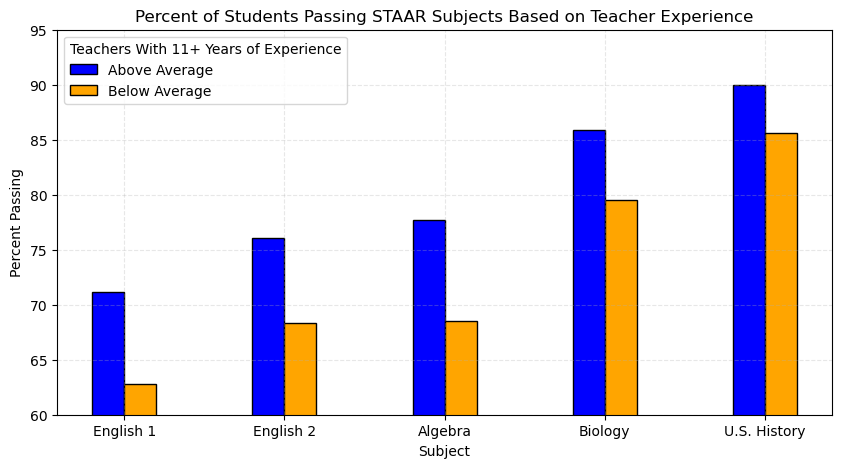

In [121]:
q2_plot(df)

In [41]:
low=train[train['teacher_exp_11_plus']<=48.5]

In [42]:
high=train[train['teacher_exp_11_plus']>48.5]

In [43]:
high.shape, low.shape

((400, 16), (378, 16))

In [44]:
stats.ttest_ind(low.biology, high.biology, alternative='less')

Ttest_indResult(statistic=-6.668443958093497, pvalue=2.454685713274511e-11)

In [45]:
stats.ttest_ind(low.english_1, high.english_1, alternative='less')

Ttest_indResult(statistic=-6.839295929568944, pvalue=8.067571662486732e-12)

In [46]:
low.english_1.mean(), high.english_1.mean()

(62.79365079365079, 71.2)

**Takeaway**
* yes

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 6:</h2>
    </header>
    <dl>
        <dt>Do schools with above average economically disadvantaged students get better STAAR scores in biology with higher extracurriculuar funding?</dt>
        <dd>- $H_0$: There is no difference in the average STAAR score for biology in schools with above average economically disadvantaged students that spend above 710 dollars on extracurriculuars compared to schools with above average economically disadvantaged students that spend below 710 dollars on extracurriculuars</dd>
        <dd>- $H_a$: The difference in the average STAAR score for biology is <strong>significantly higher</strong> in schools with above average economically disadvantaged students that spend above 710 dollars on extracurriculuars compared to schools with above average economically disadvantaged students that spend below 710 dollars on extracurriculuars</dd>
    </dl>
</div>

In [246]:
a= train[(train['econdis']>58.5) & (train['extracurricular_expend']>710)]
b= train[(train['econdis']>58.5) & (train['extracurricular_expend']<=710)]

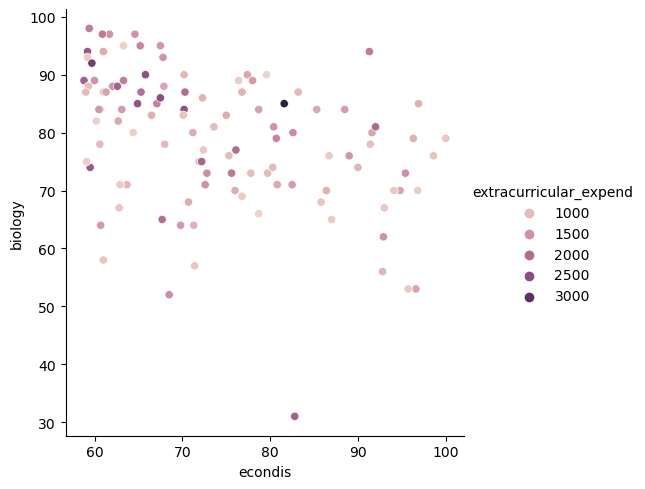

In [145]:
sns.relplot(x='econdis', y='biology', hue='extracurricular_expend', data=a)
plt.show()

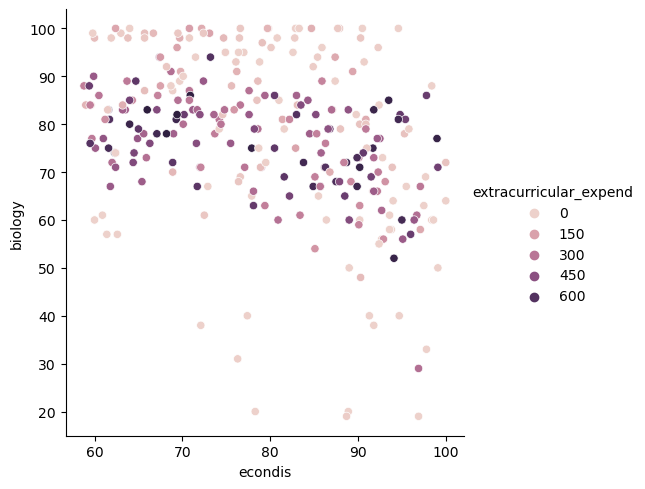

In [147]:
sns.relplot(x='econdis', y='biology', hue='extracurricular_expend', data=b)
plt.show()

In [153]:
stats.ttest_ind(a.biology, b.biology, alternative='greater')

Ttest_indResult(statistic=1.0509302181059097, pvalue=0.1469673928196535)

In [249]:
stats.ttest_ind(a.english_1, b.english_1, alternative='greater')

Ttest_indResult(statistic=1.0464605986113928, pvalue=0.14799498831692132)

In [156]:
def q6_plots():
    '''
    This function plots the necessary plots to visualize explore question 1
    '''
    a= train[(train['econdis']>58.5) & (train['extracurricular_expend']>710)]
    b= train[(train['econdis']>58.5) & (train['extracurricular_expend']<=710)]
    plt.figure(figsize=(10,5))
    plt.subplot(221)
    sns.histplot(x='biology', data=a)
    plt.title('Percent of Students With a Passing STAAR Score in Schools Spending More Than $710')
    plt.xlabel('Percent Passing Biology')
    plt.grid(True, alpha=0.3, linestyle='--')

    plt.subplot(222)
    sns.histplot(x='biology', data=b)
    plt.title('Percent of Students With a Passing STAAR Score in Schools Spending Less Than $710')
    plt.xlabel('Percent Passing Biology')
    plt.grid(True, alpha=0.3, linestyle='--')
    
    plt.figure(figsize=(25,10))
    plt.subplot(223)
    plt.title('Schools Spending More Than $710 vs. Schools Spending Less Than $710')
    sns.histplot(x='biology', data=a, alpha=.5, color='green', label= 'Schools Spending More Than $710')
    sns.histplot(x='biology', data=b, alpha=.25, label='Schools Spending Less Than $710')
    plt.xlabel('Percent Passing Biology')
    plt.axvline(x=(a['biology'].mean()), color='red', label='More Than $710 Mean')
    plt.axvline(x=(b['biology'].mean()), color='yellow', label='Less Than $710 Mean')
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.subplots_adjust(left=0.1,
                            bottom=-0.1,
                            right=0.9,
                            top=0.9,
                            wspace=0.4,
                            hspace=0.4)
    plt.show()

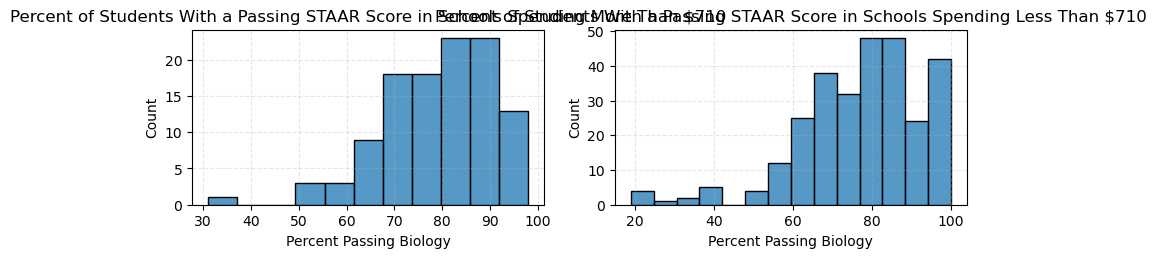

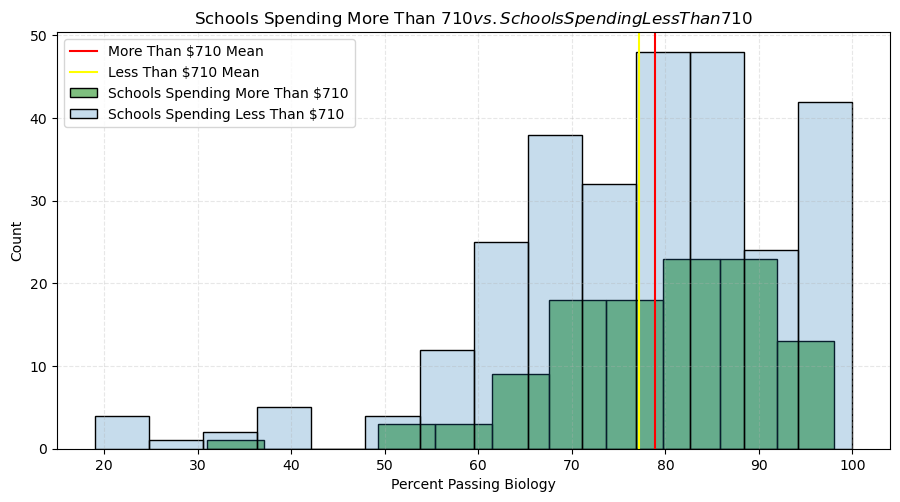

In [158]:
q6_plots()

In [159]:
train[train['biology']<70]['total_expend'].mean()

10983.863247863248

In [163]:
train[(train['biology']<70) & (train['total_expend']>10900)].shape

(41, 16)

In [164]:
train[(train['biology']<70) & (train['total_expend']<=10900)].shape

(76, 16)

# teachers experience in econdis

In [168]:
a= train[(train['econdis']>58.5) & (train['teacher_exp_0to5']>30)]
b= train[(train['econdis']<58.5) & (train['teacher_exp_0to5']<=30)]

In [169]:
stats.ttest_ind(a.biology, b.biology, alternative='less')

Ttest_indResult(statistic=-4.2660010362293965, pvalue=1.2473994878616895e-05)

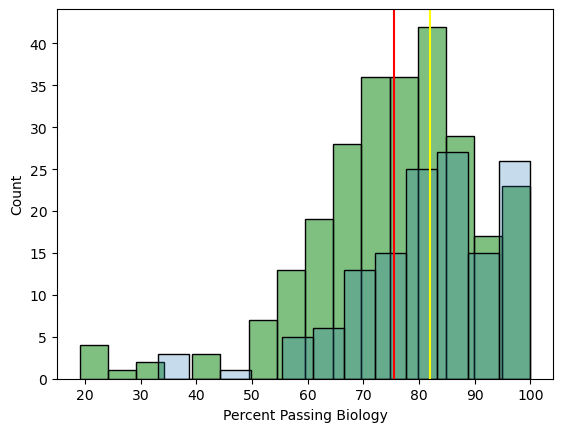

In [170]:
sns.histplot(x='biology', data=a, alpha=.5, color='green')
sns.histplot(x='biology', data=b, alpha=.25)
plt.xlabel('Percent Passing Biology')
plt.axvline(x=(a['biology'].mean()), color='red', label='More Than $710 Mean')
plt.axvline(x=(b['biology'].mean()), color='yellow', label='Less Than $710 Mean')
plt.show()

In [171]:
a['biology'].mean()

75.41538461538461

In [172]:
b['biology'].mean()

81.94852941176471

In [173]:
a= train[(train['econdis']>58.5) & (train['teacher_exp_6to10']>19)]
b= train[(train['econdis']>58.5) & (train['teacher_exp_6to10']<=19)]

In [175]:
stats.ttest_ind(a.biology, b.biology, alternative='greater')

Ttest_indResult(statistic=2.1389118771156554, pvalue=0.016528509467670142)

In [176]:
a['biology'].mean(), b['biology'].mean()

(79.225, 76.06122448979592)

In [177]:
a= train[(train['econdis']>58.5) & (train['teacher_exp_11_plus']>48)]
b= train[(train['econdis']>58.5) & (train['teacher_exp_11_plus']<=48)]

In [178]:
stats.ttest_ind(a.biology, b.biology, alternative='greater')

Ttest_indResult(statistic=4.379689286434711, pvalue=7.626227443874838e-06)

In [179]:
a['biology'].mean(), b['biology'].mean()

(81.6258064516129, 75.10788381742739)

In [180]:
a= train[(train['econdis']>58.5) & (train['teacher_exp_0to5']>30)]
b= train[(train['econdis']>58.5) & (train['teacher_exp_0to5']<=30)]

In [185]:
a['high_edu'].mean()

29.73692307692307

In [186]:
b['high_edu'].mean()

34.287499999999994

In [189]:
a= train[(train['econdis']>58.5)]
b= train[(train['econdis']<58.5)]

In [190]:
a['high_edu'].mean()

31.29974747474748

In [191]:
b['high_edu'].mean()

30.38950131233598

In [192]:
a= train[(train['high_edu']>=50)]
b= train[(train['high_edu']<50)]

In [197]:
a.teacher_exp_11_plus.mean()

51.82045454545453

In [198]:
b.teacher_exp_11_plus.mean()

48.322070844686664

In [199]:
# higher education is pretty evenly distributed

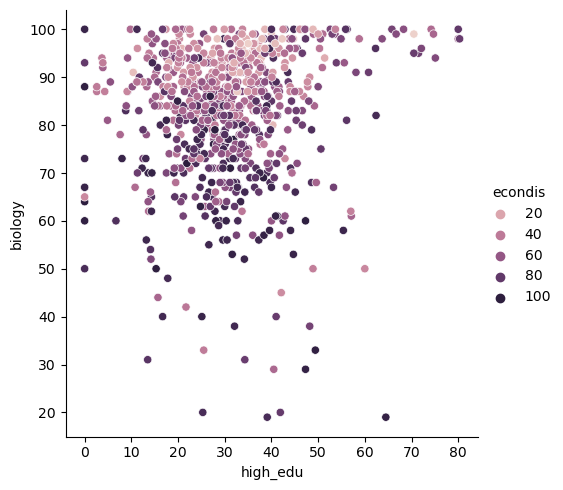

In [212]:
sns.relplot(x='high_edu', y='biology', hue='econdis', data=train)
plt.show()